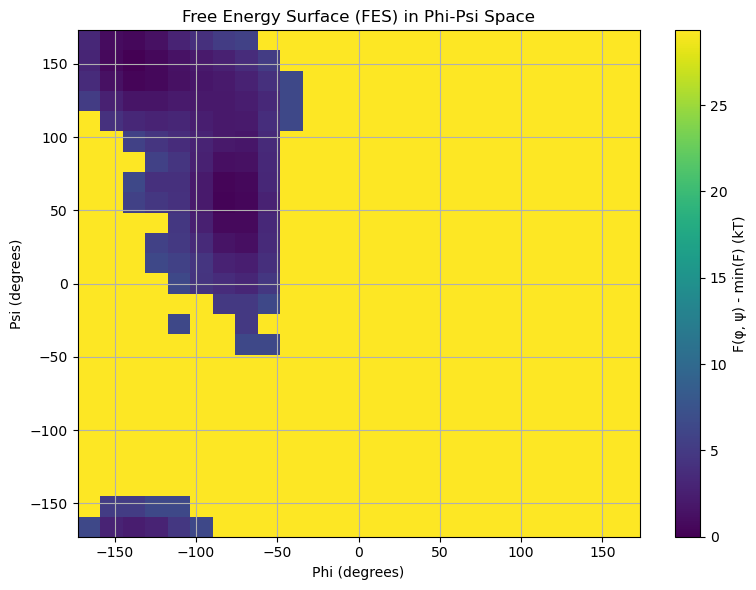

In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate the free energy surface (FES)
def compute_fes(traj, bins=25):
    """
    Compute the free energy surface (FES) in the phi-psi space.

    Parameters:
    traj : md.Trajectory
        The mdtraj trajectory object containing the data.
    bins : int
        Number of bins in each direction for the histogram.

    Returns:
    fes : 2D numpy array
        The free energy surface values on the grid.
    x_bin_centers : 1D numpy array
        The center of the bins for phi.
    y_bin_centers : 1D numpy array
        The center of the bins for psi.
    """
    # Compute phi and psi angles in radians
    phi_indices, phi_angles = md.compute_phi(traj)
    psi_indices, psi_angles = md.compute_psi(traj)

    # Convert angles to degrees
    phi_angles_deg = np.degrees(phi_angles[:, 0])
    psi_angles_deg = np.degrees(psi_angles[:, 0])

    # Define the range for the angles
    range_phi = (-180, 180)
    range_psi = (-180, 180)

    # Compute the 2D histogram
    histogram, x_edges, y_edges = np.histogram2d(
        phi_angles_deg, psi_angles_deg, bins=bins, range=[range_phi, range_psi]
    )

    # Convert histogram to free energy surface: F(phi, psi) = -log(histogram)
    # Add a small value to avoid taking log(0)
    histogram += 1e-10  # Avoid log(0) issues
    fes = -np.log(histogram)

    # Normalize the free energy by subtracting the minimum value
    fes -= np.min(fes)

    # Compute the bin centers for plotting
    x_bin_centers = 0.5 * (x_edges[:-1] + x_edges[1:])
    y_bin_centers = 0.5 * (y_edges[:-1] + y_edges[1:])

    return fes, x_bin_centers, y_bin_centers

# Load the trajectory (replace with your file names)
trajectory = md.load('adp_T300.xtc', top='adp.gro')

# Compute the free energy surface
fes, x_centers, y_centers = compute_fes(trajectory, bins=25)

# Plot the free energy surface using imshow
plt.figure(figsize=(8, 6))
extent = [x_centers[0], x_centers[-1], y_centers[0], y_centers[-1]]
im = plt.imshow(fes.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(im, label='F(φ, ψ) - min(F) (kT)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface (FES) in Phi-Psi Space')
plt.grid(True)
plt.tight_layout()
plt.show()

output_filename = "Free_Energy_Surface_in_Phi-Psi_Space"
plt.savefig(output_filename, dpi=300)
plt.close()
